#Practica 3.4 Asociacion
Integrantes:
Eustaquio Amaya Harold Martin,
Fuentes Viveros Adan Emilio,
Moreno Razo Laura Mildred.

##Caso de negocio

## Preparación del ambiente

Se importan las librerias

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Se carga y explora el archivo como DataFrame

In [5]:
#Carga del dataframe
df = pd.read_csv('Ventas_Bebidas_Demo.csv', encoding='latin-1')

#Tamaño del dataset
print(df.shape)

# Información básica sobre los datos
print("\n")
df.info()
print("\n")
# Estadísticas descriptivas de los datos
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(52672, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52672 entries, 0 to 52671
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PEDIDO            52672 non-null  object 
 1   TIENDA            52672 non-null  int64  
 2   FECHA             52672 non-null  object 
 3   SABOR             52672 non-null  object 
 4   MARCA             52672 non-null  object 
 5   SEGMENTO          52672 non-null  int64  
 6   SEGMENTO_DESC     52672 non-null  object 
 7   MUNICIPIO         52672 non-null  object 
 8   PRODUCTO          52672 non-null  int64  
 9   PRODUCTO_DESC     52672 non-null  object 
 10  UNIDADES          52672 non-null  int64  
 11  MONTO             52672 non-null  float64
 12  PROM_TEMPERATURA  52672 non-null  float64
 13  PRECIO_UNIDAD     52672 non-null  float64
 14  CONTADOR          52672 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 6.0+ MB




,TIENDA,SEGMENTO,PRODUCTO,UNIDADES,MONTO,PROM_TEMPERATURA,PRECIO_UNIDAD,CONTADOR
count,5.267200e+04,52672.000000,52672.000000,52672.000000,52672.000000,52672.000000,52672.000000,52672.0
mean,1.000035e+09,107.821347,1356.895409,15.182355,105.831204,26.317224,7.895904,1.0
std,2.130213e+04,2.242291,2358.359076,20.832765,140.716441,6.543932,4.700192,0.0
min,1.000006e+09,104.000000,1.000000,1.000000,0.000000,3.500000,0.000000,1.0
25%,1.000007e+09,105.000000,108.000000,5.000000,31.500000,22.800000,4.370000,1.0
50%,1.000043e+09,109.000000,424.000000,12.000000,75.150000,27.800000,6.500000,1.0
75%,1.000043e+09,110.000000,1423.000000,16.000000,115.500000,31.300000,9.830000,1.0
max,1.000071e+09,110.000000,9322.000000,624.000000,5840.000000,39.400000,26.000000,1.0


In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PEDIDO,TIENDA,FECHA,SABOR,MARCA,SEGMENTO,SEGMENTO_DESC,MUNICIPIO,PRODUCTO,PRODUCTO_DESC,UNIDADES,MONTO,PROM_TEMPERATURA,PRECIO_UNIDAD,CONTADOR
0,1000244507,1000043345,06-07-13,MANZANA,DEL VALLE,110,EXTRA GRANDE BAJO AUDITABLE,GUADALUPE,9322,JDV Manz Nec 100 m,24,48.0,31.9,2.0,1
1,1000242608,1000043345,02-07-13,MANGO,DEL VALLE,110,EXTRA GRANDE BAJO AUDITABLE,GUADALUPE,9321,JDV Mango Nec 100,24,48.0,26.5,2.0,1
2,1000250602,1000050643,03-07-13,MANGO,DEL VALLE,108,MEDIANO BAJO AUDITABLE,SAN NICOLAS DE LOS GZA,9321,JDV Mango Nec 100,48,96.0,30.1,2.0,1
3,1000239117,1000038155,06-07-13,MANGO,DEL VALLE,109,GRANDE BAJO AUDITABLE,SAN NICOLAS DE LOS GZA,9321,JDV Mango Nec 100,24,48.0,31.1,2.0,1
4,1000244507,1000043345,06-07-13,MANGO,DEL VALLE,110,EXTRA GRANDE BAJO AUDITABLE,GUADALUPE,9321,JDV Mango Nec 100,24,48.0,31.9,2.0,1


##Selección de variables

* PEDIDO: Actúa como identificador único para cada transacción, crucial para agrupar los productos comprados en una misma compra.

* PRODUCTO_DESC: Es el foco del análisis, ya que el objetivo es identificar patrones de compra entre los diferentes productos de bebidas.Los algoritmos de asociación están diseñados para encontrar combinaciones frecuentes de ítems (en este caso productos especificos) en las transacciones.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Número de productos únicos: 247
Número total de pedidos: 2517


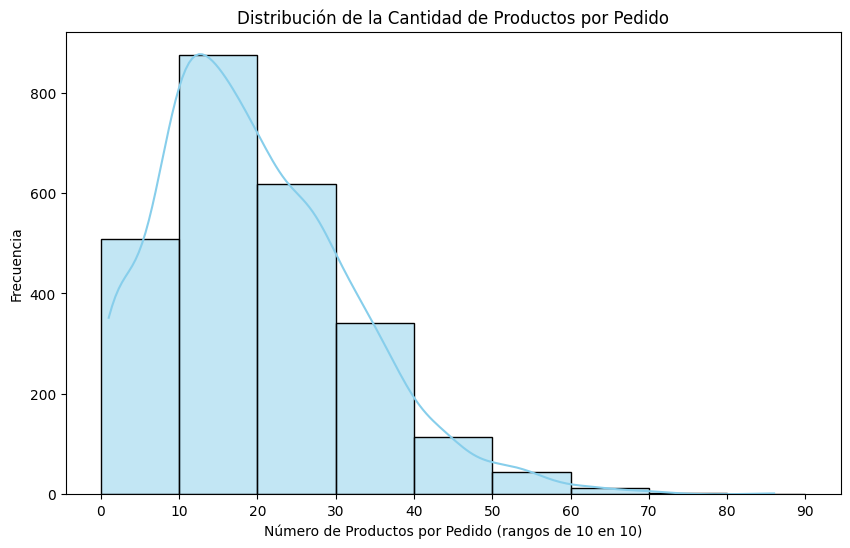

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


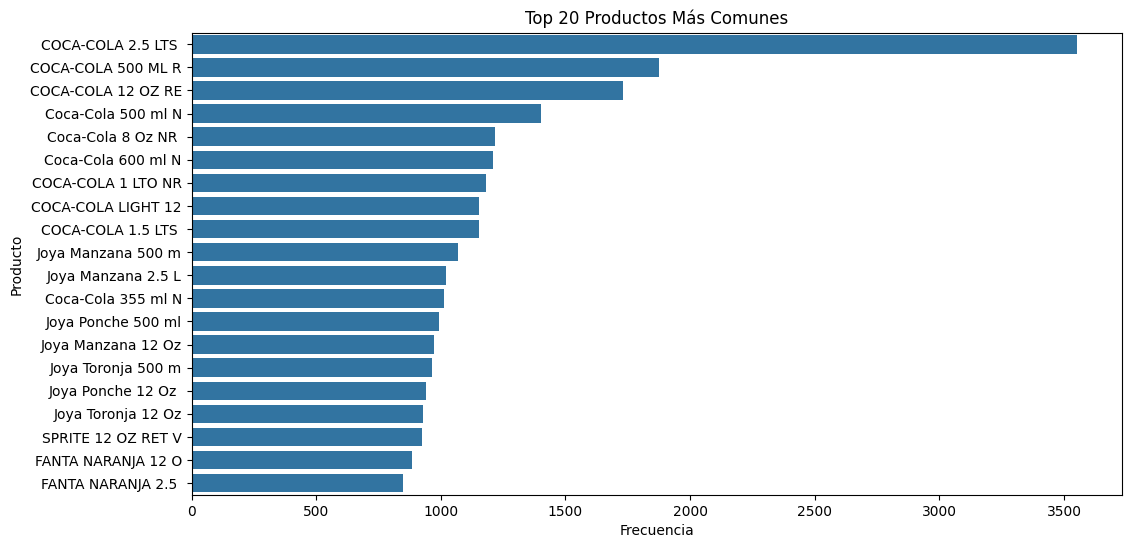

In [12]:
num_unique_products = df['PRODUCTO_DESC'].nunique()
print(f"Número de productos únicos: {num_unique_products}")

# Número total de pedidos
num_orders = df['PEDIDO'].nunique()
print(f"Número total de pedidos: {num_orders}")

# Agrupar por PEDIDO y contar la cantidad de productos únicos
products_per_order = df.groupby('PEDIDO')['PRODUCTO_DESC'].apply(lambda x: x.unique()).reset_index()
products_per_order['NUM_PRODUCTOS'] = products_per_order['PRODUCTO_DESC'].apply(len)

# Visualizar la distribución de productos por pedido
plt.figure(figsize=(10, 6))
sns.histplot(products_per_order['NUM_PRODUCTOS'], bins=range(0, products_per_order['NUM_PRODUCTOS'].max() + 10, 10), kde=True, color='skyblue')
plt.title('Distribución de la Cantidad de Productos por Pedido')
plt.xlabel('Número de Productos por Pedido (rangos de 10 en 10)')
plt.ylabel('Frecuencia')
plt.xticks(range(0, products_per_order['NUM_PRODUCTOS'].max() + 10, 10))  # Ajusta el rango de los ticks del eje x
plt.show()

# Verificar los productos más comunes
product_counts = df['PRODUCTO_DESC'].value_counts().reset_index()
product_counts.columns = ['PRODUCTO_DESC', 'FRECUENCIA']

plt.figure(figsize=(12, 6))
sns.barplot(x='FRECUENCIA', y='PRODUCTO_DESC', data=product_counts.head(20))
plt.title('Top 20 Productos Más Comunes')
plt.xlabel('Frecuencia')
plt.ylabel('Producto')
plt.show()

##Umbral de soporte

##Algoritmos

###Apriori

In [8]:
basket = df[['PEDIDO', 'PRODUCTO_DESC']]

# Crear una tabla con One-Hot Encoding
basket_one_hot = pd.get_dummies(basket['PRODUCTO_DESC'])

# Asignar el índice de cada pedido al DataFrame original
basket_one_hot['PEDIDO'] = basket['PEDIDO']

# Agrupar por pedido y aplicar max para obtene (0/1)
basket_grouped = basket_one_hot.groupby(basket_one_hot['PEDIDO']).max()
#print(basket_grouped)

# Aplicar Apriori
frequent_itemsets = apriori(basket_grouped, min_support=0.15, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Mostrar los resultados
#print(frequent_itemsets)
sorted = rules.sort_values(by='lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
sorted = rules.sort_values(by='lift', ascending=False)
sorted.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
68174,"(FANTA NARANJA 500 , Joya Manzana 500 m)","(Joya Ponche 500 ml, Joya Toronja 500 m, SPRIT...",0.152165,0.154549,0.151768,0.997389,6.453543,0.128251,323.807708,0.996711
68168,"(Joya Ponche 500 ml, FANTA NARANJA 500 )","(Joya Toronja 500 m, Joya Manzana 500 m, SPRIT...",0.152165,0.154549,0.151768,0.997389,6.453543,0.128251,323.807708,0.996711
68159,"(Joya Ponche 500 ml, Joya Toronja 500 m, SPRIT...","(FANTA NARANJA 500 , Joya Manzana 500 m)",0.154549,0.152165,0.151768,0.982005,6.453543,0.128251,47.115387,0.999521
68165,"(Joya Toronja 500 m, Joya Manzana 500 m, SPRIT...","(Joya Ponche 500 ml, FANTA NARANJA 500 )",0.154549,0.152165,0.151768,0.982005,6.453543,0.128251,47.115387,0.999521
23841,"(FANTA NARANJA 500 , Joya Manzana 500 m)","(SPRITE 500 ML RET , Joya Toronja 500 m)",0.152165,0.155741,0.151768,0.997389,6.404154,0.128070,323.351212,0.995302


###FP-Growth

In [15]:
frequent_itemsets_fp = fpgrowth(basket_grouped, min_support=0.15, use_colnames=True)

# Generar reglas de asociación
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)

# Mostrar los resultados
sorted_rules = rules_fp.sort_values(by='lift', ascending=False)

# Imprimir las reglas más fuertes
sorted_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
332238,"(FANTA NARANJA 500 , Joya Manzana 500 m)","(Joya Ponche 500 ml, Joya Toronja 500 m, SPRIT...",0.152165,0.154549,0.151768,0.997389,6.453543,0.128251,323.807708,0.996711
332232,"(Joya Ponche 500 ml, FANTA NARANJA 500 )","(Joya Toronja 500 m, Joya Manzana 500 m, SPRIT...",0.152165,0.154549,0.151768,0.997389,6.453543,0.128251,323.807708,0.996711
332229,"(Joya Toronja 500 m, Joya Manzana 500 m, SPRIT...","(Joya Ponche 500 ml, FANTA NARANJA 500 )",0.154549,0.152165,0.151768,0.982005,6.453543,0.128251,47.115387,0.999521
332223,"(Joya Ponche 500 ml, Joya Toronja 500 m, SPRIT...","(FANTA NARANJA 500 , Joya Manzana 500 m)",0.154549,0.152165,0.151768,0.982005,6.453543,0.128251,47.115387,0.999521
332193,"(FANTA NARANJA 500 , Joya Manzana 500 m)","(SPRITE 500 ML RET , Joya Toronja 500 m)",0.152165,0.155741,0.151768,0.997389,6.404154,0.128070,323.351212,0.995302


##Impacto de las variables

##Evaluación algoritmos

##Resultados de los algoritmos

##Conclusiones

SObre el negocio